___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers.
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 23486 Rows and 10 column variables. Each row includes a written comment as well as additional customer information.
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones.
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model.***.

Classically, you can start to know the data after doing the import and load operations.
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words
- Create Word Cloud


#### 5. Sentiment Classification with Machine Learning

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Leraning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting, Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [1]:
from google.colab import files
uploaded = files.upload()


Saving Womens Clothing E-Commerce Reviews.csv to Womens Clothing E-Commerce Reviews.csv


In [2]:
import tensorflow as tf
import os

In [3]:
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

In [4]:
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [5]:
strategy = tf.distribute.TPUStrategy(resolver)

In [6]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from warnings import filterwarnings
filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [7]:
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [9]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33.0,NaN,Absolutely wonderful - silky and sexy and comf...,4.0,1.0,0.0,Initmates,Intimate,Intimates
1,1,1080,34.0,NaN,Love this dress! it's sooo pretty. i happene...,5.0,1.0,4.0,General,Dresses,Dresses
2,2,1077,60.0,Some major design flaws,I had such high hopes for this dress and reall...,3.0,0.0,0.0,General,Dresses,Dresses
3,3,1049,50.0,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,1.0,0.0,General Petite,Bottoms,Pants
4,4,847,47.0,Flattering shirt,This shirt is very flattering to all due to th...,5.0,1.0,6.0,General,Tops,Blouses


In [10]:
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33.0,NaN,Absolutely wonderful - silky and sexy and comf...,4.0,1.0,0.0,Initmates,Intimate,Intimates
1,1080,34.0,NaN,Love this dress! it's sooo pretty. i happene...,5.0,1.0,4.0,General,Dresses,Dresses
2,1077,60.0,Some major design flaws,I had such high hopes for this dress and reall...,3.0,0.0,0.0,General,Dresses,Dresses
3,1049,50.0,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,1.0,0.0,General Petite,Bottoms,Pants
4,847,47.0,Flattering shirt,This shirt is very flattering to all due to th...,5.0,1.0,6.0,General,Tops,Blouses


### Data Wrangling

Data wrangling typically involves pre-processing steps such as data collection, cleaning, and organizing. The goal during this process is to transform the data into a usable and meaningful form for subsequent stages.

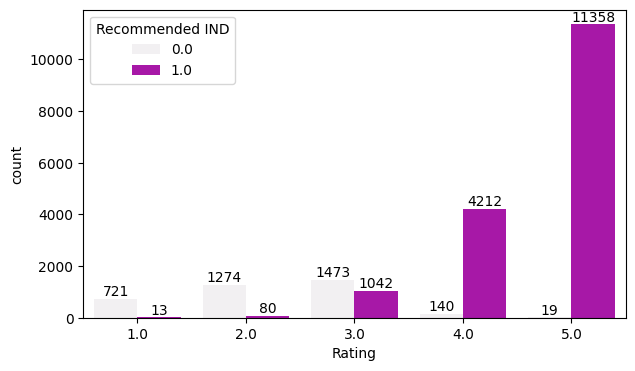

In [11]:
plt.figure(figsize = (7,4))
ax = sns.countplot(x="Rating",
                   data=df,
                   hue = "Recommended IND",
                   color='m')
for p in ax.containers:
    ax.bar_label(p)

In [12]:
df["Recommended IND"].unique()

array([ 1.,  0., nan])

In [13]:
len(df)

20333

In [14]:
len(df[(df["Rating"] == 1) & (df["Recommended IND"] == 1)])

13

In [15]:
len(df[~((df["Rating"] == 1) & (df["Recommended IND"] == 1))])

20320

In [16]:
df = df[~((df["Rating"] == 1) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 2) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 3) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 4) & (df["Recommended IND"] == 0))]
df = df[~((df["Rating"] == 5) & (df["Recommended IND"] == 0))]

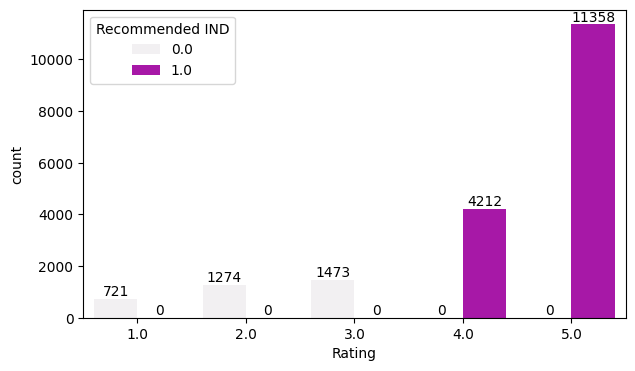

In [17]:
plt.figure(figsize = (7,4))
ax = sns.countplot(x="Rating",
                   data=df,
                   hue = "Recommended IND",
                   color='m')
for p in ax.containers:
  ax.bar_label(p)

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

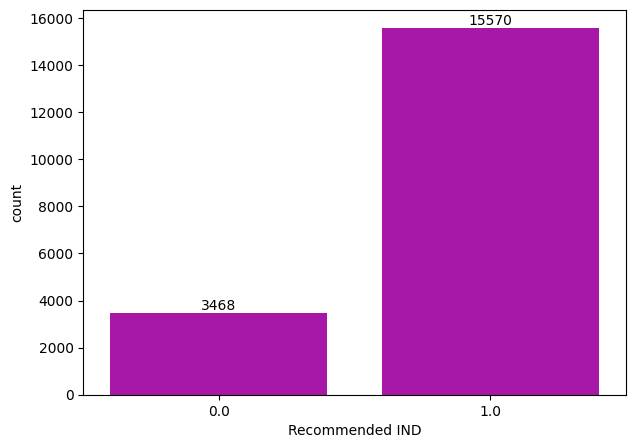

In [18]:
plt.fig = plt.figure(figsize = (7,5))
ax = sns.countplot(x="Recommended IND",
                   data=df,
                   color='m')
ax.bar_label(ax.containers[0]);

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [19]:
df.rename(columns={"Review Text":"text", "Recommended IND":"label"},
          inplace=True)

In [20]:
df.head()

,Clothing ID,Age,Title,text,Rating,label,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33.0,NaN,Absolutely wonderful - silky and sexy and comf...,4.0,1.0,0.0,Initmates,Intimate,Intimates
1,1080,34.0,NaN,Love this dress! it's sooo pretty. i happene...,5.0,1.0,4.0,General,Dresses,Dresses
2,1077,60.0,Some major design flaws,I had such high hopes for this dress and reall...,3.0,0.0,0.0,General,Dresses,Dresses
3,1049,50.0,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,1.0,0.0,General Petite,Bottoms,Pants
4,847,47.0,Flattering shirt,This shirt is very flattering to all due to th...,5.0,1.0,6.0,General,Tops,Blouses


In [21]:
df=df[['text','label']]
df.head()

,text,label
0,Absolutely wonderful - silky and sexy and comf...,1.0
1,Love this dress! it's sooo pretty. i happene...,1.0
2,I had such high hopes for this dress and reall...,0.0
3,"I love, love, love this jumpsuit. it's fun, fl...",1.0
4,This shirt is very flattering to all due to th...,1.0


---
---


### Missing Value Detection

In [22]:
df.isnull().sum()

text     712
label      1
dtype: int64

In [23]:
df.dropna(inplace = True)
df.reset_index(drop=True,
               inplace=True)
df

,text,label
0,Absolutely wonderful - silky and sexy and comf...,1.0
1,Love this dress! it's sooo pretty. i happene...,1.0
2,I had such high hopes for this dress and reall...,0.0
3,"I love, love, love this jumpsuit. it's fun, fl...",1.0
4,This shirt is very flattering to all due to th...,1.0
...,...,...
18322,I normally don't care for rayon clothing but t...,1.0
18323,"As a teacher, it's so great to be able to find...",1.0
18324,I bought the black and love it. i bought both ...,1.0
18325,I absolutely love this blouse! it's easily one...,1.0


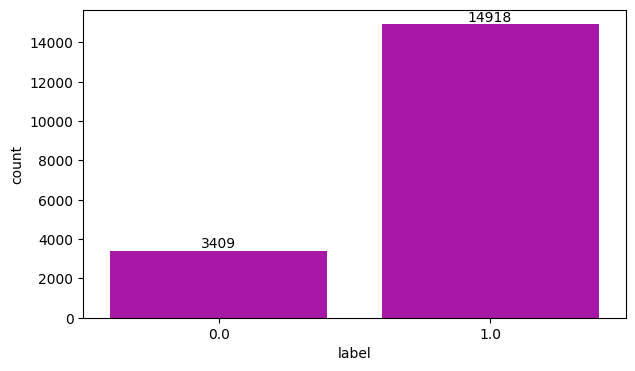

In [24]:
plt.fig = plt.figure(figsize = (7,4))
ax = sns.countplot(x="label",
                   data=df,
                   color='m')
ax.bar_label(ax.containers[0]);

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma).
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [25]:
stop_words = stopwords.words('english')

for i in ["not", "no"]:
        stop_words.remove(i)

In [26]:
def cleaning(data):

    #1. Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower())

    #2. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]

    #joining
    return " ".join(text_cleaned)

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words
- Create Word Cloud


### Detect Reviews (positive and negative separately)

In [27]:
positive_sentences = df[df["label"] == 1]["text"]
positive_sentences = positive_sentences.apply(cleaning)
positive_sentences

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store im ...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
6        aded basket hte last mintue see would look lik...
                               ...                        
18321    jean great summer great high waist fit stretch...
18322    normally dont care rayon clothing fabric feel ...
18323    teacher great able find dress modest beautiful...
18324    bought black love bought medium large going ke...
18325    absolutely love blouse easily one favorite ret...
Name: text, Length: 14918, dtype: object

In [28]:
negative_sentences = df[df["label"] == 0]["text"]
negative_sentences = negative_sentences.apply(cleaning)
negative_sentences

2        high hope dress really wanted work initially o...
5        love tracy reese dress one not petite foot tal...
10       dress run small esp zipper area run ordered sp...
20       first not pullover styling side zipper wouldnt...
22       loved material didnt really look long dress pu...
                               ...                        
18290    quality piece except fit way c bust long narro...
18297    ive looking perfect white eyelet maxi feel lik...
18299    really wanted love bought rush needed replace ...
18308          ordered vest line returned due poor quality
18326    would not recommend pant curvy athletic figure...
Name: text, Length: 3409, dtype: object

### Collect Words (positive and negative separately)

In [29]:
positive_words = " ".join(positive_sentences)
positive_words[:1000]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt aded basket hte last mintue see would look like person store pick went teh darkler color pale hte color really gorgeous turn mathced everythiing trying prefectly little baggy hte x hte msallet size bummer no petite decided jkeep though said matvehd everything ejans pant skirt waas trying kept oops ordered carbon store pick ton stuff always try used top pair skirt pant everything went color really nice charcoal shimmer went well pencil skirt flare pant etc compaint bit big sleeve long doesnt go petite also bit loose no xx kept wil ldecide later since light color alread

In [30]:
negative_words = " ".join(negative_sentences)
negative_words[:1000]

'high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c love tracy reese dress one not petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame not stranger alteration shortening narrowing skirt would take away embellishment garment love color idea style not work returned dress dress run small esp zipper area run ordered sp typically fit tight material top look feel cheap even pulling cause rip fabric pretty disappointed going christmas dress year needle say going back first not pullover styling side zipper wouldnt purchased knew side zipper large bust side zipper next impossible second tulle feel look cheap slip awkward tight shape underneath not look like described sadly returning im sure fi

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [31]:
from wordcloud import WordCloud

In [32]:
wordcloud_positive = WordCloud(background_color="white",
                               max_words =250,
                               scale=3,
                               colormap="Blues")

In [33]:
wordcloud_positive.generate(positive_words)

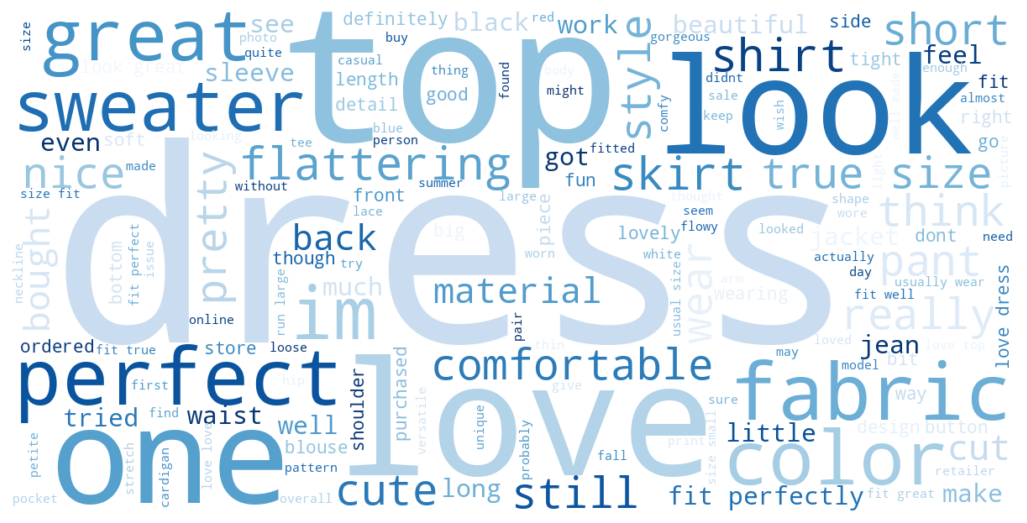

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(wordcloud_positive,
           interpolation="bilinear")
plt.axis("off")
plt.show()

In [35]:
wordcloud_negative = WordCloud(background_color="white",
                               max_words=250,
                               scale=3,
                               colormap="Reds")

In [36]:

wordcloud_negative.generate(negative_words)


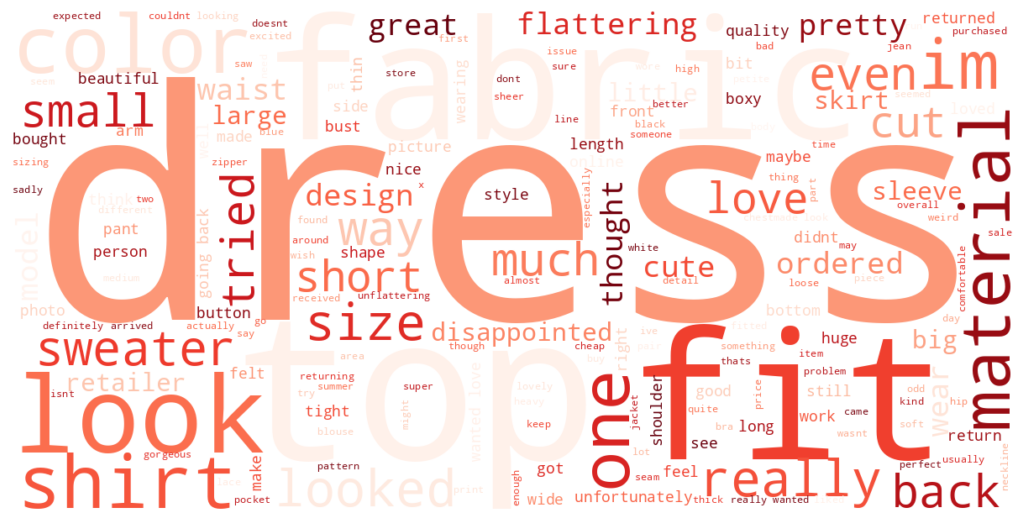

In [37]:

plt.figure(figsize=(13,13))
plt.imshow(wordcloud_negative,
           interpolation="bilinear")
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning and Deep Learning

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.**
**For BERT model, use TF tensor.**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting,
- Deep Learning Model,
- BERT Model.

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X = df["text"].values
y = df["label"].map({0:1, 1:0}).values

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    stratify=y,
                                                    random_state=101)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
vectorizer = CountVectorizer(preprocessor=cleaning,
                             min_df=3,
                             max_df=0.90)
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [43]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [44]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

,aa,ab,abdomen,ability,able,abo,absolute,absolutely,absolutley,abstract,...,yummy,zero,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16489,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
16490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16491,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16492,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning,
                                    min_df=3,
                                    max_df=0.90)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [47]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [48]:
pd.DataFrame(X_train_tf_idf.toarray(),
             columns = tf_idf_vectorizer.get_feature_names_out())

,aa,ab,abdomen,ability,able,abo,absolute,absolutely,absolutley,abstract,...,yummy,zero,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.162225,0.0,0.0,0.0,0.0
16490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
16491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
16492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


## Eval functions

In [49]:
from sklearn.metrics import confusion_matrix,classification_report, f1_score, recall_score, accuracy_score, precision_score

In [50]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

## Logistic Regression

### CountVectorizer

In [51]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C=0.01,
                         max_iter=1000,
                         class_weight= "balanced",
                         random_state=101)
log.fit(X_train_count,y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [52]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[1296  196]
 [  41  300]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1492
           1       0.60      0.88      0.72       341

    accuracy                           0.87      1833
   macro avg       0.79      0.87      0.82      1833
weighted avg       0.90      0.87      0.88      1833

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     13426
           1       0.64      0.90      0.75      3068

    accuracy                           0.89     16494
   macro avg       0.81      0.89      0.84     16494
weighted avg       0.91      0.89      0.89     16494



In [53]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring= ["accuracy", "f1", "recall", "precision"]

model = LogisticRegression(C =0.01,
                           max_iter=1000,
                           class_weight= "balanced",
                           random_state=101)
scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.872741
train_accuracy     0.886046
test_f1            0.717061
train_f1           0.746809
test_recall        0.866684
train_recall       0.903484
test_precision     0.611652
train_precision    0.636447
dtype: float64

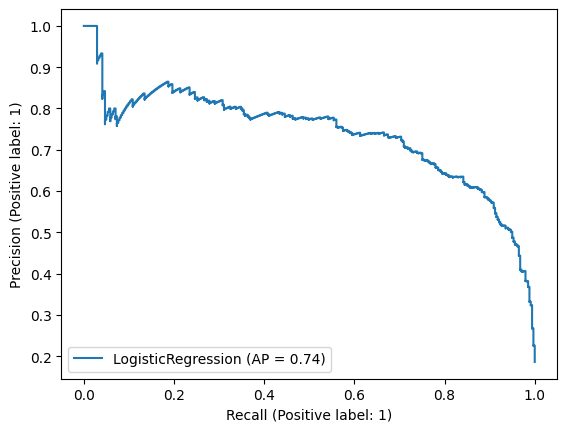

In [54]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

PrecisionRecallDisplay.from_estimator(log,
                                      X_test_count,
                                      y_test);

# PrecisionRecallDisplay.from_prediction(y_test, y_pred);

In [55]:
y_pred = log.predict(X_test_count)
y_pred_proba= log.predict_proba(X_test_count)[:,1]

log_AP_count = average_precision_score(y_test, y_pred_proba)
log_count_rec = recall_score(y_test, y_pred)
log_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [56]:
log = LogisticRegression(C=0.06,
                         max_iter=1000,
                         random_state=101,
                         class_weight="balanced")
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.06, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [57]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[1276  216]
 [  37  304]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1492
           1       0.58      0.89      0.71       341

    accuracy                           0.86      1833
   macro avg       0.78      0.87      0.81      1833
weighted avg       0.90      0.86      0.87      1833

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     13426
           1       0.62      0.91      0.73      3068

    accuracy                           0.88     16494
   macro avg       0.80      0.89      0.83     16494
weighted avg       0.91      0.88      0.89     16494



In [58]:
model = LogisticRegression(C=0.06,
                           max_iter=1000,
                           random_state=101,
                           class_weight="balanced")
scores = cross_validate(model,
                        X_train_tf_idf,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.866496
train_accuracy     0.876480
test_f1            0.709541
train_f1           0.731991
test_recall        0.876464
train_recall       0.906816
test_precision     0.596204
train_precision    0.613685
dtype: float64

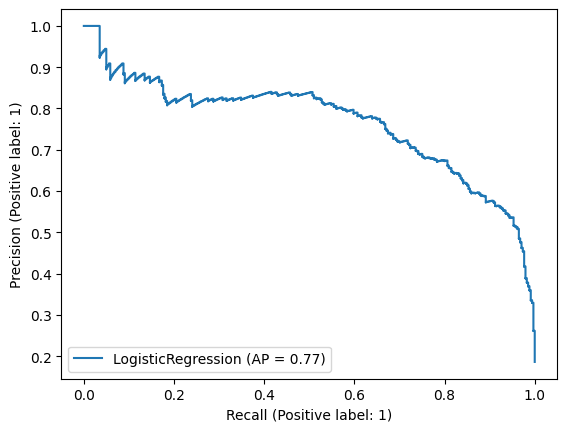

In [59]:
PrecisionRecallDisplay.from_estimator(log,
                                      X_test_tf_idf,
                                      y_test);

In [60]:
y_pred = log.predict(X_test_tf_idf)
y_pred_proba= log.predict_proba(X_test_tf_idf)[:,1]


log_AP_tfidf = average_precision_score(y_test, y_pred_proba)
log_tfidf_rec = recall_score(y_test, y_pred)
log_tfidf_f1 = f1_score(y_test,y_pred)

## Naive Bayes

### Countvectorizer

In [61]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = MultinomialNB(alpha=1.5)
nb.fit(X_train_count,y_train)

MultinomialNB(alpha=1.5)

In [62]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
[[1386  106]
 [  83  258]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1492
           1       0.71      0.76      0.73       341

    accuracy                           0.90      1833
   macro avg       0.83      0.84      0.83      1833
weighted avg       0.90      0.90      0.90      1833

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     13426
           1       0.77      0.85      0.80      3068

    accuracy                           0.92     16494
   macro avg       0.87      0.89      0.88     16494
weighted avg       0.93      0.92      0.92     16494



In [63]:
model = MultinomialNB(alpha=1.5)
scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.907179
train_accuracy     0.924680
test_f1            0.761225
train_f1           0.806679
test_recall        0.795976
train_recall       0.844850
test_precision     0.729972
train_precision    0.771812
dtype: float64

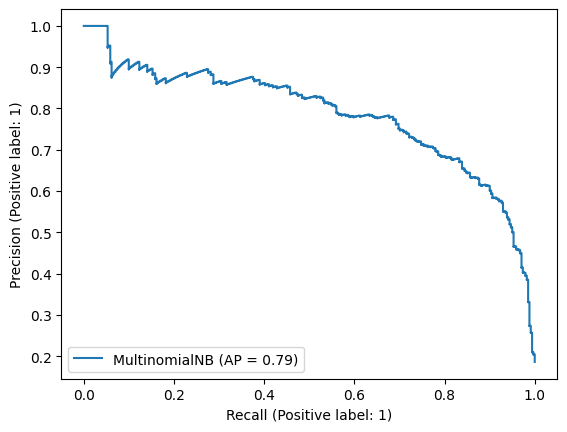

In [64]:
PrecisionRecallDisplay.from_estimator(nb,
                                      X_test_count,
                                      y_test);

In [65]:
y_pred = nb.predict(X_test_count)
y_pred_proba= nb.predict_proba(X_test_count)[:,1]

nb_AP_count = average_precision_score(y_test, y_pred_proba)
nb_count_rec = recall_score(y_test, y_pred)
nb_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [66]:
nb = BernoulliNB(alpha=0.7)
nb.fit(X_train_tf_idf,y_train)

BernoulliNB(alpha=0.7)

In [67]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[1388  104]
 [  84  257]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1492
           1       0.71      0.75      0.73       341

    accuracy                           0.90      1833
   macro avg       0.83      0.84      0.83      1833
weighted avg       0.90      0.90      0.90      1833

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     13426
           1       0.75      0.84      0.80      3068

    accuracy                           0.92     16494
   macro avg       0.86      0.89      0.87     16494
weighted avg       0.92      0.92      0.92     16494



In [68]:
model = BernoulliNB(alpha=0.7)
scores = cross_validate(model,
                        X_train_tf_idf,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]


test_accuracy      0.899660
train_accuracy     0.919284
test_f1            0.744507
train_f1           0.794743
test_recall        0.786195
train_recall       0.840106
test_precision     0.707398
train_precision    0.754032
dtype: float64

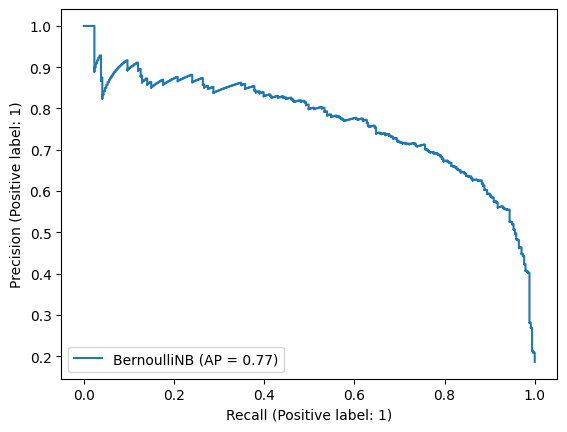

In [69]:
PrecisionRecallDisplay.from_estimator(nb,
                                      X_test_tf_idf,
                                      y_test);

In [70]:
y_pred = nb.predict(X_test_tf_idf)
y_pred_proba= nb.predict_proba(X_test_tf_idf)[:,1]


nb_AP_tfidf = average_precision_score(y_test, y_pred_proba)
nb_tfidf_rec = recall_score(y_test, y_pred)
nb_tfidf_f1 = f1_score(y_test,y_pred)

## Support Vector Machine (SVM)

### Countvectorizer

In [71]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.001,
                class_weight="balanced",
                random_state=101)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.001, class_weight='balanced', random_state=101)

In [72]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[1293  199]
 [  40  301]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1492
           1       0.60      0.88      0.72       341

    accuracy                           0.87      1833
   macro avg       0.79      0.87      0.82      1833
weighted avg       0.90      0.87      0.88      1833

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     13426
           1       0.64      0.91      0.75      3068

    accuracy                           0.89     16494
   macro avg       0.81      0.90      0.84     16494
weighted avg       0.91      0.89      0.90     16494



In [73]:
model = LinearSVC(C=0.001,
                  class_weight="balanced",
                  random_state=101)
scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.873893
train_accuracy     0.887515
test_f1            0.719715
train_f1           0.750072
test_recall        0.869946
train_recall       0.907431
test_precision     0.613849
train_precision    0.639227
dtype: float64

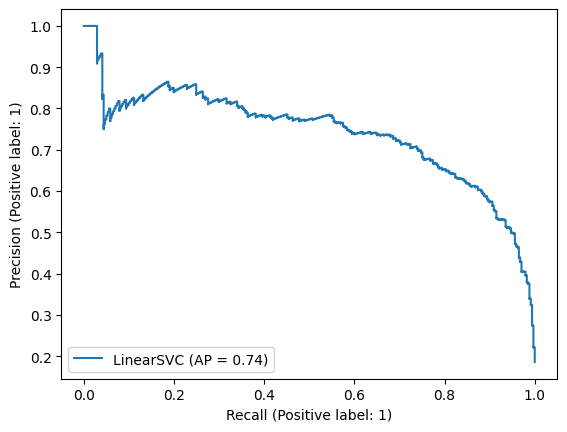

In [74]:
PrecisionRecallDisplay.from_estimator(svc,
                                      X_test_count,
                                      y_test);

In [75]:
y_pred = svc.predict(X_test_count)
decision_function= svc.decision_function(X_test_count)

svc_AP_count = average_precision_score(y_test, decision_function)
svc_count_rec = recall_score(y_test, y_pred)
svc_count_f1 = f1_score(y_test,y_pred)

### TD-IDF

In [76]:
svc = LinearSVC(C=0.03,
                class_weight="balanced",
                random_state=101)
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.03, class_weight='balanced', random_state=101)

In [77]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[1310  182]
 [  34  307]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1492
           1       0.63      0.90      0.74       341

    accuracy                           0.88      1833
   macro avg       0.80      0.89      0.83      1833
weighted avg       0.91      0.88      0.89      1833

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.89      0.94     13426
           1       0.66      0.93      0.78      3068

    accuracy                           0.90     16494
   macro avg       0.82      0.91      0.86     16494
weighted avg       0.92      0.90      0.91     16494



In [78]:
model = LinearSVC(C=0.03,
                  class_weight="balanced",
                  random_state=101)
scores = cross_validate(model,
                        X_train_tf_idf,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.883654
train_accuracy     0.899721
test_f1            0.739477
train_f1           0.775926
test_recall        0.887222
train_recall       0.933362
test_precision     0.634108
train_precision    0.663946
dtype: float64

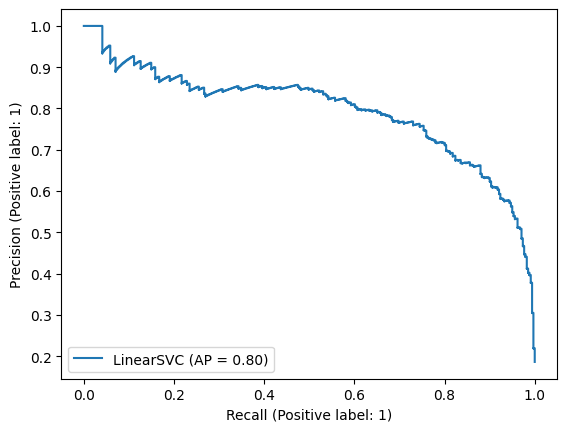

In [79]:
PrecisionRecallDisplay.from_estimator(svc,
                                      X_test_tf_idf,
                                      y_test);

In [80]:
y_pred = svc.predict(X_test_tf_idf)
decision_function= svc.decision_function(X_test_tf_idf)

svc_AP_tfidf = average_precision_score(y_test, decision_function)
svc_tfidf_rec = recall_score(y_test, y_pred)
svc_tfidf_f1 = f1_score(y_test,y_pred)

## Random Forest

### Countvectorizer

In [81]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100,
                            max_depth = 7,
                            random_state = 42,
                            n_jobs = -1,
                            class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_jobs=-1,
                       random_state=42)

In [82]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[1280  212]
 [  65  276]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      1492
           1       0.57      0.81      0.67       341

    accuracy                           0.85      1833
   macro avg       0.76      0.83      0.78      1833
weighted avg       0.88      0.85      0.86      1833

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     13426
           1       0.59      0.86      0.70      3068

    accuracy                           0.86     16494
   macro avg       0.78      0.86      0.81     16494
weighted avg       0.90      0.86      0.87     16494



In [83]:
model = RandomForestClassifier(100,
                               max_depth = 7,
                               random_state = 42,
                               n_jobs = -1,
                               class_weight="balanced")
scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.842731
train_accuracy     0.860885
test_f1            0.664104
train_f1           0.700848
test_recall        0.835397
train_recall       0.875851
test_precision     0.551435
train_precision    0.584253
dtype: float64

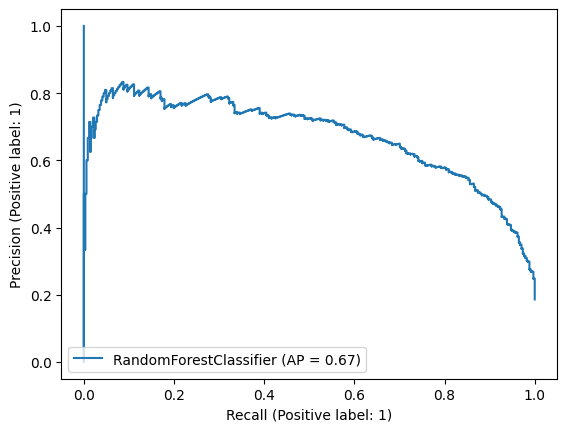

In [84]:
PrecisionRecallDisplay.from_estimator(rf,
                                      X_test_count,
                                      y_test);

In [85]:
y_pred = rf.predict(X_test_count)
y_pred_proba= rf.predict_proba(X_test_count)[:,1]

rf_AP_count = average_precision_score(y_test, y_pred_proba)
rf_count_rec = recall_score(y_test, y_pred)
rf_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [86]:
rf = RandomForestClassifier(100,
                            max_depth = 7,
                            random_state = 42,
                            n_jobs = -1,
                            class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_jobs=-1,
                       random_state=42)

In [87]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[1243  249]
 [  58  283]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      1492
           1       0.53      0.83      0.65       341

    accuracy                           0.83      1833
   macro avg       0.74      0.83      0.77      1833
weighted avg       0.88      0.83      0.85      1833

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     13426
           1       0.58      0.90      0.70      3068

    accuracy                           0.86     16494
   macro avg       0.77      0.87      0.80     16494
weighted avg       0.90      0.86      0.87     16494



In [88]:
model = RandomForestClassifier(100,
                               max_depth = 7,
                               random_state = 42,
                               n_jobs = -1,
                               class_weight="balanced")
scores = cross_validate(model,
                        X_train_tf_idf,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.832241
train_accuracy     0.854553
test_f1            0.649958
train_f1           0.695372
test_recall        0.837024
train_recall       0.892184
test_precision     0.531560
train_precision    0.569811
dtype: float64

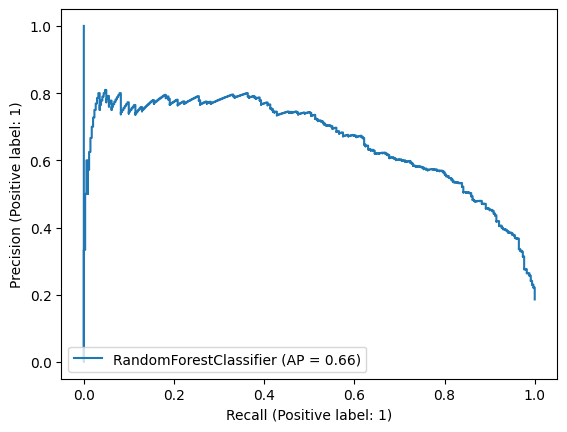

In [89]:
PrecisionRecallDisplay.from_estimator(rf,
                                      X_test_tf_idf,
                                      y_test);

In [90]:
y_pred = rf.predict(X_test_tf_idf)
y_pred_proba= rf.predict_proba(X_test_tf_idf)[:,1]

rf_AP_tfidf = average_precision_score(y_test, y_pred_proba)
rf_tfidf_rec = recall_score(y_test, y_pred)
rf_tfidf_f1 = f1_score(y_test,y_pred)

## Ada Boosting

### Countvectorizer

In [91]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators= 100,
                         random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [92]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[1424   68]
 [ 162  179]]
Test_Set
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1492
           1       0.72      0.52      0.61       341

    accuracy                           0.87      1833
   macro avg       0.81      0.74      0.77      1833
weighted avg       0.87      0.87      0.87      1833

Train_Set
              precision    recall  f1-score   support

           0       0.91      0.96      0.94     13426
           1       0.78      0.61      0.68      3068

    accuracy                           0.90     16494
   macro avg       0.85      0.78      0.81     16494
weighted avg       0.89      0.90      0.89     16494



In [93]:
model = AdaBoostClassifier(n_estimators= 100,
                           random_state = 42)
scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.887958
train_accuracy     0.893941
test_f1            0.660141
train_f1           0.679779
test_recall        0.585719
train_recall       0.605244
test_precision     0.757118
train_precision    0.775309
dtype: float64

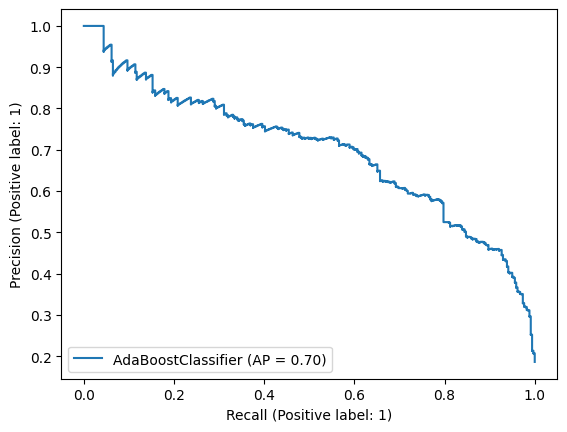

In [94]:
PrecisionRecallDisplay.from_estimator(ada,
                                      X_test_count,
                                      y_test);

In [95]:
y_pred = ada.predict(X_test_count)
y_pred_proba= ada.predict_proba(X_test_count)[:,1]

ada_AP_count = average_precision_score(y_test, y_pred_proba)
ada_count_rec = recall_score(y_test, y_pred)
ada_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [96]:
ada = AdaBoostClassifier(n_estimators= 100,
                         random_state = 42,
                         learning_rate=0.7)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(learning_rate=0.7, n_estimators=100, random_state=42)

In [97]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[1435   57]
 [ 170  171]]
Test_Set
              precision    recall  f1-score   support

           0       0.89      0.96      0.93      1492
           1       0.75      0.50      0.60       341

    accuracy                           0.88      1833
   macro avg       0.82      0.73      0.76      1833
weighted avg       0.87      0.88      0.87      1833

Train_Set
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     13426
           1       0.82      0.56      0.67      3068

    accuracy                           0.90     16494
   macro avg       0.86      0.77      0.80     16494
weighted avg       0.89      0.90      0.89     16494



In [98]:
model = AdaBoostClassifier(n_estimators= 100,
                           random_state = 42,
                           learning_rate=0.7)
scores = cross_validate(model,
                        X_train_tf_idf,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.881715
train_accuracy     0.894433
test_f1            0.619985
train_f1           0.663091
test_recall        0.519232
train_recall       0.558525
test_precision     0.770955
train_precision    0.815869
dtype: float64

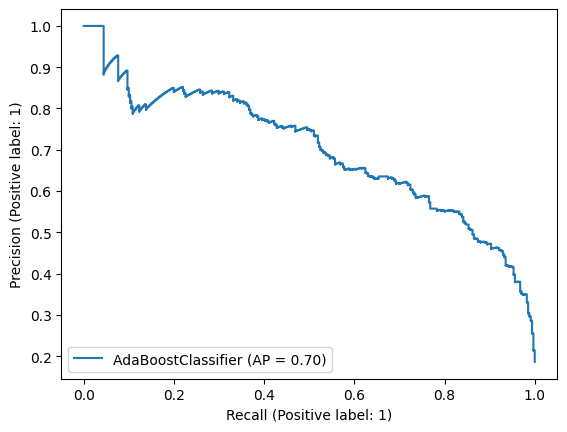

In [99]:
PrecisionRecallDisplay.from_estimator(ada,
                                      X_test_tf_idf,
                                      y_test);

In [100]:
y_pred = ada.predict(X_test_tf_idf)
y_pred_proba= ada.predict_proba(X_test_tf_idf)[:,1]

ada_AP_tfidf = average_precision_score(y_test, y_pred_proba)
ada_tfidf_rec = recall_score(y_test, y_pred)
ada_tfidf_f1 = f1_score(y_test,y_pred)

## DL modeling

In [101]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [102]:
X

array(['Absolutely wonderful - silky and sexy and comfortable',
       'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.',
       'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c',
       ...,
       'I bought the black and love it. i bought both the medium and large but am going to keep

### Tokenization

In [103]:
num_words = 15001
tokenizer = Tokenizer(num_words=num_words) #filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890'

In [104]:
tokenizer.fit_on_texts(X)

### Creating word index

In [105]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'so': 15,
 'was': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'be': 28,
 'like': 29,
 'as': 30,
 'wear': 31,
 'me': 32,
 "it's": 33,
 'great': 34,
 'or': 35,
 'too': 36,
 "i'm": 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'they': 41,
 'up': 42,
 'would': 43,
 'at': 44,
 'fabric': 45,
 'color': 46,
 'small': 47,
 'look': 48,
 'perfect': 49,
 'more': 50,
 'really': 51,
 'little': 52,
 'ordered': 53,
 'if': 54,
 'one': 55,
 'these': 56,
 'will': 57,
 'flattering': 58,
 'well': 59,
 'soft': 60,
 'out': 61,
 'an': 62,
 'can': 63,
 'back': 64,
 'comfortable': 65,
 'because': 66,
 'had': 67,
 'cute': 68,
 '\r': 69,
 'bought': 70,
 'nice': 71,
 'than': 72,
 'beautiful': 73,
 'all': 74,
 'fits': 75,
 'when': 76,
 'looks': 77,
 'bit': 78,
 'down': 79,


In [106]:
len(tokenizer.word_index)

13527

### Converting tokens to numeric

In [107]:
X_num_tokens = tokenizer.texts_to_sequences(X)

### Maximum number of tokens for all documents¶

In [108]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [109]:
num_tokens.mean()

60.23708190102035

In [110]:
num_tokens.max()

116

In [111]:
max_tokens = 116

In [112]:
sum(num_tokens <= max_tokens) / len(num_tokens)

1.0

### Fixing token counts of all documents (pad_sequences)

In [113]:
X_pad = pad_sequences(X_num_tokens,
                      maxlen = max_tokens)

In [114]:
X_pad.shape

(18327, 116)

### Train Set Split

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X_pad,
                                                    y,
                                                    test_size=0.1,
                                                    stratify=y,
                                                    random_state=101)

### Modeling

In [117]:
model = Sequential()

In [118]:
embedding_size = 50

In [119]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens))
model.add(Dropout(0.2))

model.add(GRU(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=25, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=12))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [120]:
optimizer = Adam(learning_rate=0.001)

In [121]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=["Recall"])

In [122]:
model.summary()

# embedding_size * num_words ==> 50 * 15001 = 750050

# 3 x (n2 + nm + 2n) m= input, n= output
# (50*50 + 50*50 + 2*50)*3 = 15.300 ==> m = 50, n = 50
# (25*25 + 50*25 + 2*25)*3 = 5775   ==> m = 50, n = 25
# (12*12 + 25*12 + 2*12)*3 = 1404   ==> m = 24, n = 12
# 12*1 + 1 = 13

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 116, 50)           750050    
                                                                 
 dropout (Dropout)           (None, 116, 50)           0         
                                                                 
 gru (GRU)                   (None, 116, 50)           15300     
                                                                 
 dropout_1 (Dropout)         (None, 116, 50)           0         
                                                                 
 gru_1 (GRU)                 (None, 116, 25)           5775      
                                                                 
 dropout_2 (Dropout)         (None, 116, 25)           0         
                                                                 
 gru_2 (GRU)                 (None, 12)                1

In [123]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall",
                           mode="max",
                           verbose=1,
                           patience = 2,
                           restore_best_weights=True)

In [124]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced',
                                                     y=y_train)
pd.Series(classes_weights).unique()

array([0.61425592, 2.6880704 ])

In [125]:
model.fit(X_train, y_train, epochs=10, batch_size=128, sample_weight=classes_weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/10
129/129 [==============================] - 28s 151ms/step - loss: 0.4969 - recall: 0.6904 - val_loss: 0.3656 - val_recall: 0.9355
Epoch 2/10
129/129 [==============================] - 18s 142ms/step - loss: 0.2486 - recall: 0.9218 - val_loss: 0.2947 - val_recall: 0.9267
Epoch 3/10
129/129 [==============================] - 18s 141ms/step - loss: 0.1910 - recall: 0.9469 - val_loss: 0.2464 - val_recall: 0.8563
Epoch 3: early stopping


### Model evaluation

In [126]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.496932,0.690352,0.365629,0.935484
1,0.248588,0.921773,0.294663,0.926686
2,0.190960,0.946871,0.246389,0.856305


<Axes: >

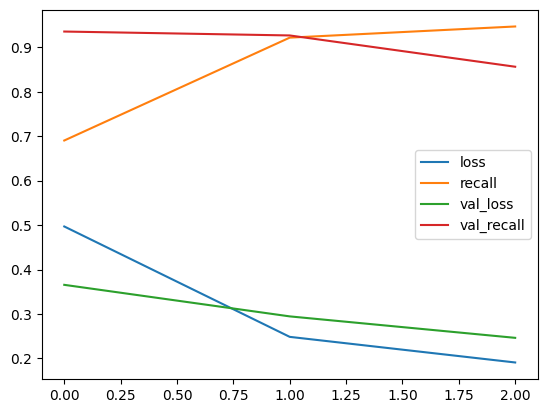

In [127]:
model_loss.plot()

In [128]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_pred = model.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

58/58 [==============================] - 3s 24ms/step
[[1211  281]
 [  22  319]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.81      0.89      1492
           1       0.53      0.94      0.68       341

    accuracy                           0.83      1833
   macro avg       0.76      0.87      0.78      1833
weighted avg       0.90      0.83      0.85      1833



In [129]:
y_train_pred = model.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

516/516 [==============================] - 10s 19ms/step
[[11066  2360]
 [  108  2960]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.82      0.90     13426
           1       0.56      0.96      0.71      3068

    accuracy                           0.85     16494
   macro avg       0.77      0.89      0.80     16494
weighted avg       0.91      0.85      0.86     16494



58/58 [==============================] - 1s 19ms/step


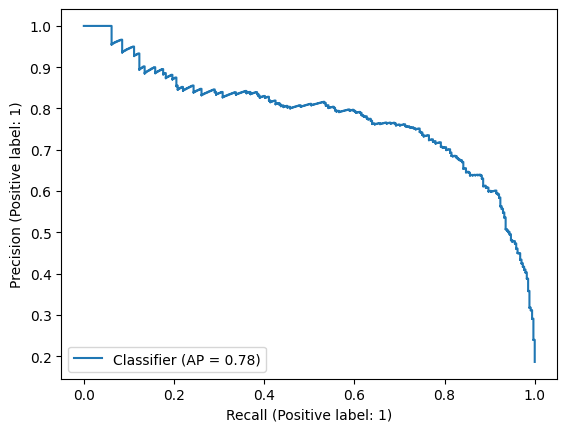

In [130]:
from sklearn.metrics import PrecisionRecallDisplay

y_pred_proba = model.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)


In [131]:
from sklearn.metrics import average_precision_score

average_precision_score(y_test, y_pred_proba)

0.7823008262736098

In [132]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

## BERT Modeling

In [133]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 37.0 MB/s eta 0:00:00


### Tokenization

In [134]:
X

array(['Absolutely wonderful - silky and sexy and comfortable',
       'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.',
       'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c',
       ...,
       'I bought the black and love it. i bought both the medium and large but am going to keep

In [135]:
from transformers import AutoTokenizer #BertTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# For every sentence...
num_of_sent_tokens = []
for sent in X:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.

    input_ids = tokenizer.encode(sent,
                                 add_special_tokens=True)
    num_of_sent_tokens.append(len(input_ids))

print('Max sentence length: ', max(num_of_sent_tokens))

(…)cased/resolve/main/tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

(…)rt-base-uncased/resolve/main/config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

(…)bert-base-uncased/resolve/main/vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

(…)base-uncased/resolve/main/tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Max sentence length:  162


In [136]:
np.array(num_of_sent_tokens).mean()

76.29371964860589

In [137]:
sum(np.array(num_of_sent_tokens) <= 162) / len(num_of_sent_tokens)

1.0

In [138]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,
                                                        y,
                                                        test_size=0.1,
                                                        stratify=y,
                                                        random_state=101)

In [139]:
all_sentence_tokens = tokenizer(list(X),
                                max_length=162,
                                truncation=True,
                                padding='max_length',
                                add_special_tokens=True)

In [140]:
np.array(all_sentence_tokens['input_ids'])

array([[ 101, 7078, 6919, ...,    0,    0,    0],
       [ 101, 2293, 2023, ...,    0,    0,    0],
       [ 101, 1045, 2018, ...,    0,    0,    0],
       ...,
       [ 101, 1045, 4149, ...,    0,    0,    0],
       [ 101, 1045, 7078, ...,    0,    0,    0],
       [ 101, 1045, 2052, ...,    0,    0,    0]])

In [141]:
np.array(all_sentence_tokens['attention_mask'])

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [142]:
def transformation(X):
  # set array dimensions
  seq_len = 162

  all_sentence_tokens = tokenizer(list(X),
                                  max_length=seq_len,
                                  truncation=True,
                                  padding='max_length',
                                  add_special_tokens=True)

  return np.array(all_sentence_tokens['input_ids']), np.array(all_sentence_tokens['attention_mask'])

In [143]:
Xids_train, Xmask_train = transformation(X_train2)

Xids_test, Xmask_test = transformation(X_test2)

In [144]:
Xids_train

array([[  101,  3866,  2023, ...,     0,     0,     0],
       [  101,  1045,  4149, ...,     0,     0,     0],
       [  101,  3866,  2023, ...,     0,     0,     0],
       ...,
       [  101,  2023, 18686, ...,     0,     0,     0],
       [  101,  1045,  2572, ...,     0,     0,     0],
       [  101,  1045,  2428, ...,     0,     0,     0]])

In [145]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)


Xids_train.shape  : (16494, 162)
Xmask_train.shape : (16494, 162)
Xids_test.shape   : (1833, 162)
Xmask_test.shape  : (1833, 162)


In [146]:
labels_train = y_train2.reshape(-1,1)
labels_train

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [147]:
labels_test = y_test2.reshape(-1,1)
labels_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

### Transformation Matrix to Tensorflow Tensor

In [148]:
import tensorflow as tf

dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train,
                                                    Xmask_train,
                                                    labels_train))
dataset_train

<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [149]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test,
                                                   Xmask_test,
                                                   labels_test))
dataset_test

<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [150]:
def map_func(Tensor_Xids, Tensor_Xmask, Tensor_labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}, Tensor_labels

In [151]:
# then we use the dataset map method to apply this transformation
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)

In [152]:
dataset_train

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [153]:
dataset_test

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

## Batch Size

In [154]:
batch_size = 32

# batch_size
# fit into a batch of 32
train_ds = dataset_train.batch(batch_size)
val_ds = dataset_test.batch(batch_size)


In [155]:
!pip install -q tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 29.7 MB/s eta 0:00:00


In [156]:
from official.nlp import optimization
epochs = 2
#batch_size = 32
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5  # 3e-5, 5e-5
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [157]:
print(len(train_ds)*2)
print(int(0.1*len(train_ds)*2))

1032
103


### Creating Model with TPU

In [158]:
def create_model():
    from transformers import TFAutoModel #TFBertModel
    from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization
    from tensorflow.keras import Model

    model = TFAutoModel.from_pretrained("bert-base-uncased")

    input_ids = Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(162,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]

    x = Dense(80, activation='relu')(embeddings)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name="dropout")(x) #0.1
    y = Dense(1, activation='sigmoid', name='outputs')(x)

    return Model(inputs=[input_ids, attention_mask], outputs=y)

In [159]:
with strategy.scope():

  #from tensorflow.keras.optimizers import Adam
  from keras.losses import BinaryCrossentropy
  #from tensorflow.keras.metrics import Recall

  #optimizer = Adam(learning_rate=2e-5) #3e-5, 5e-5
  loss = tf.keras.losses.BinaryCrossentropy()
  recall = tf.keras.metrics.Recall()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [160]:
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 162)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 162)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 162,                                           

In [161]:
model3.fit(train_ds, validation_data= val_ds, epochs=epochs)

Epoch 1/2
516/516 [==============================] - 223s 210ms/step - loss: 0.5508 - recall: 0.8468 - val_loss: 0.4890 - val_recall: 0.9120
Epoch 2/2
516/516 [==============================] - 54s 105ms/step - loss: 0.4373 - recall: 0.9149 - val_loss: 0.3377 - val_recall: 0.8182


## Model evaluation

In [162]:
model_loss = pd.DataFrame(model3.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.550783,0.846806,0.489024,0.912023
1,0.437349,0.914928,0.337687,0.818182


<Axes: >

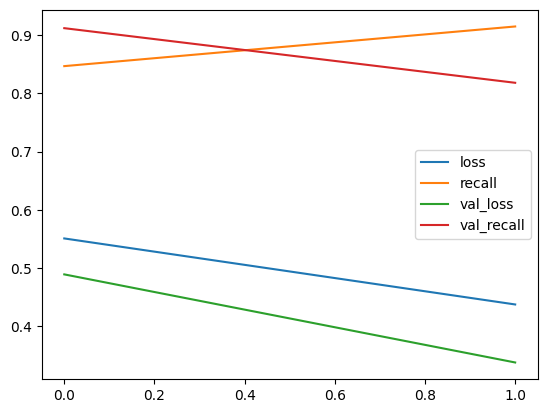

In [163]:
model_loss.plot()

In [164]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model3.predict(val_ds) >= 0.5

print(classification_report(y_test2, y_pred))

58/58 [==============================] - 17s 183ms/step
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1492
           1       0.84      0.82      0.83       341

    accuracy                           0.94      1833
   macro avg       0.90      0.89      0.90      1833
weighted avg       0.94      0.94      0.94      1833



In [165]:
y_train_pred = model3.predict(train_ds) >= 0.5

print(classification_report(y_train2, y_train_pred))

516/516 [==============================] - 16s 28ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     13426
           1       0.91      0.91      0.91      3068

    accuracy                           0.97     16494
   macro avg       0.95      0.95      0.95     16494
weighted avg       0.97      0.97      0.97     16494



58/58 [==============================] - 3s 27ms/step


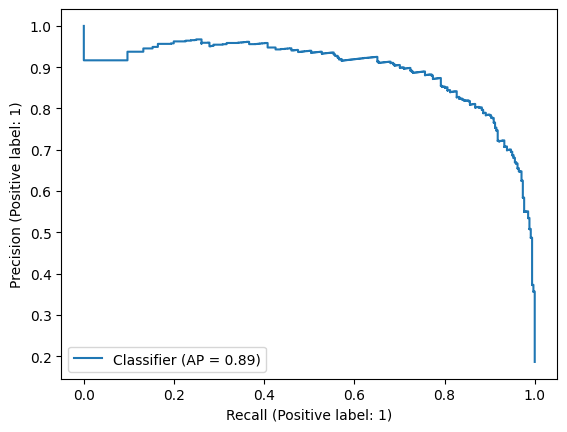

In [166]:
y_pred_proba = model3.predict(val_ds)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)

In [167]:
average_precision_score(y_test2, y_pred_proba)

0.8927987079363907

In [168]:
BERT_without_weighted_AP = average_precision_score(y_test2, y_pred_proba)
BERT_without_weighted_f1 = f1_score(y_test2, y_pred)
BERT_without_weighted_rec = recall_score(y_test2, y_pred)

## BERT Model with Weighted

In [169]:
def create_model():
    from transformers import TFAutoModel
    from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization
    from tensorflow.keras import Model

    model = TFAutoModel.from_pretrained("bert-base-uncased")

    input_ids = Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(162,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]

    x = Dense(80, activation='relu')(embeddings)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name="dropout")(x) #0.1
    y = Dense(1, activation='sigmoid', name='outputs')(x)

    return Model(inputs=[input_ids, attention_mask], outputs=y)

In [170]:
from official.nlp import optimization
epochs = 2
#batch_size = 32
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5  # 3e-5, 5e-5
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [171]:
with strategy.scope():

  from tensorflow.keras.optimizers import Adam
  #from tensorflow.keras.losses import BinaryCrossentropy
  #from tensorflow.keras.metrics import Recall

  optimizer = optimizer #Adam(learning_rate=2e-5) #3e-5, 5e-5
  loss = tf.keras.losses.BinaryCrossentropy()
  precision = tf.keras.metrics.Recall()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[precision])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [172]:
pd.Series(y).value_counts(normalize=True)

0    0.81399
1    0.18601
dtype: float64

In [173]:
weights = {0:0.18, 1:0.81}

In [174]:
model3.fit(
    train_ds, validation_data= val_ds,
    epochs=epochs, class_weight=weights)

Epoch 1/2
516/516 [==============================] - 190s 211ms/step - loss: 0.1317 - recall_1: 0.8765 - val_loss: 0.6746 - val_recall_1: 0.9912
Epoch 2/2
516/516 [==============================] - 55s 106ms/step - loss: 0.0944 - recall_1: 0.9524 - val_loss: 0.3214 - val_recall_1: 0.9179


In [175]:
y_pred = model3.predict(val_ds) >= 0.5


print(classification_report(y_test2, y_pred))

58/58 [==============================] - 18s 183ms/step
              precision    recall  f1-score   support

           0       0.98      0.93      0.96      1492
           1       0.76      0.92      0.83       341

    accuracy                           0.93      1833
   macro avg       0.87      0.93      0.89      1833
weighted avg       0.94      0.93      0.93      1833



In [176]:
y_train_pred = model3.predict(train_ds) >= 0.5


print(classification_report(y_train2, y_train_pred))

516/516 [==============================] - 16s 28ms/step
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     13426
           1       0.83      0.96      0.89      3068

    accuracy                           0.96     16494
   macro avg       0.91      0.96      0.93     16494
weighted avg       0.96      0.96      0.96     16494



In [177]:
y_pred_proba = model3.predict(val_ds)
average_precision_score(y_test2, y_pred_proba)

58/58 [==============================] - 3s 29ms/step


0.9064624055869301

In [178]:
BERT_with_weighted_AP = average_precision_score(y_test2, y_pred_proba)
BERT_with_weighted_f1 = f1_score(y_test2, y_pred)
BERT_with_weighted_rec = recall_score(y_test2, y_pred)

### Compare Models F1 Scores, Recall Scores and Average Precision Score

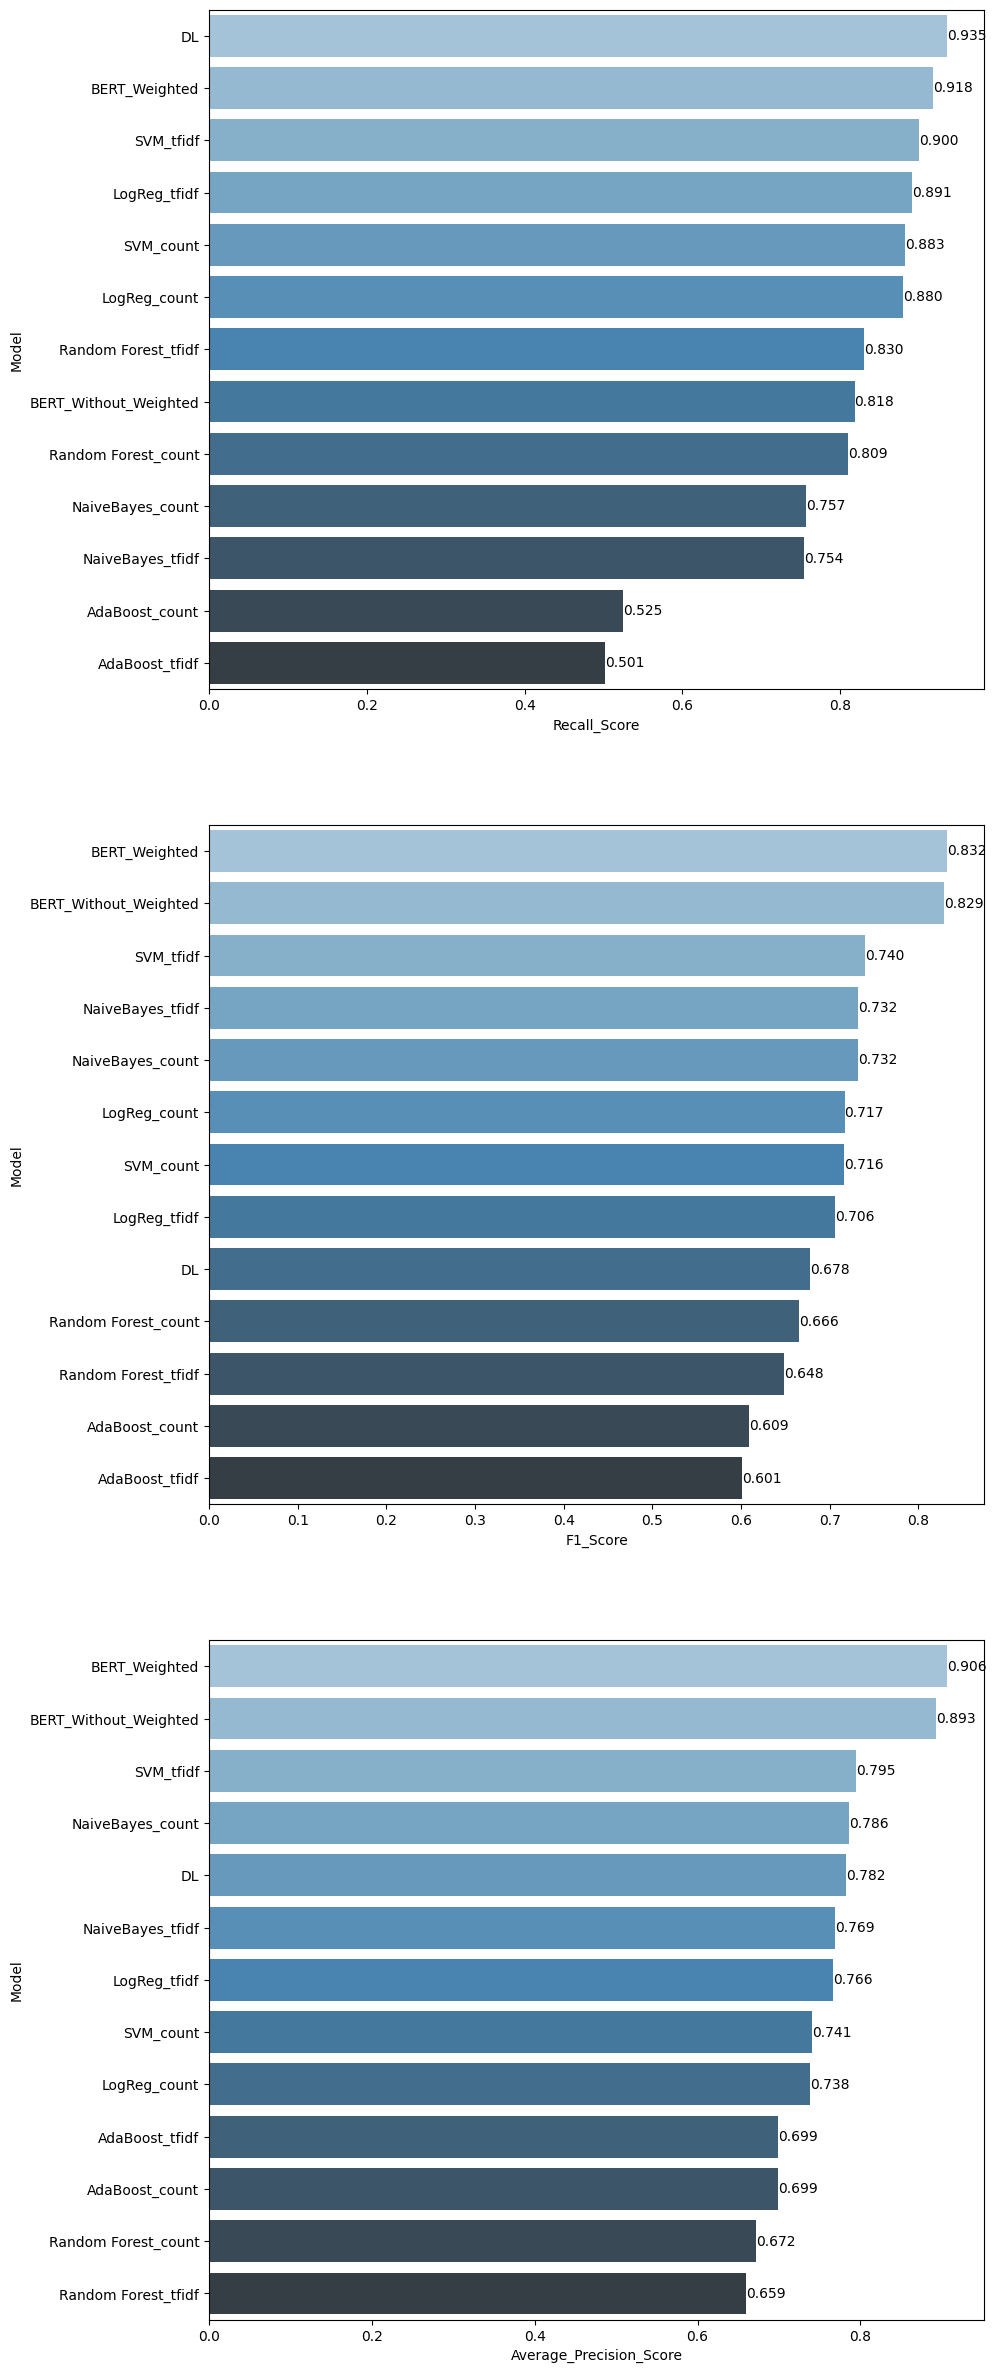

In [179]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count",
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf",
                                  "Random Forest_tfidf", "AdaBoost_tfidf", "DL", "BERT_Weighted", "BERT_Without_Weighted"],

                        "F1_Score": [nb_count_f1, log_count_f1, svc_count_f1, rf_count_f1, ada_count_f1, nb_tfidf_f1,
                                     log_tfidf_f1, svc_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1, DL_f1, BERT_with_weighted_f1,
                                     BERT_without_weighted_f1],

                        "Recall_Score": [nb_count_rec, log_count_rec, svc_count_rec, rf_count_rec, ada_count_rec, nb_tfidf_rec,
                                         log_tfidf_rec, svc_tfidf_rec, rf_tfidf_rec, ada_tfidf_rec, DL_rec, BERT_with_weighted_rec,
                                         BERT_without_weighted_rec],

                        "Average_Precision_Score": [nb_AP_count, log_AP_count, svc_AP_count, rf_AP_count, ada_AP_count, nb_AP_tfidf,
                                                    log_AP_tfidf, svc_AP_tfidf, rf_AP_tfidf, ada_AP_tfidf, DL_AP, BERT_with_weighted_AP,
                                                    BERT_without_weighted_AP]})


plt.figure(figsize=(10,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score",
                              ascending=False)
ax=sns.barplot(x="Recall_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="F1_Score",
                              ascending=False)
ax=sns.barplot(x="F1_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score",
                              ascending=False)
ax=sns.barplot(x="Average_Precision_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

## BERT Large Uncased

In [180]:
#from transformers import AutoTokenizer
#tokenizer = AutoTokenizer.from_pretrained("bert-large-uncased")

#from transformers import TFAutoModel
#model = TFAutoModel.from_pretrained("bert-large-uncased")

### Conclusion

In [182]:
#BERT Weighted is the best model

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___